In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# load data
data = pd.read_csv('effect_tb.csv',header = None)
data.columns = ["dt","user_id","label","strategy_id"]

# no need to use dt
data = data.drop(columns = "dt")
data.head(3)

,user_id,label,strategy_id
0,1,0,1
1,1000004,0,1
2,1000004,0,2


In [15]:
# table summary
data.describe()

,user_id,label,strategy_id
count,2.645958e+06,2.645958e+06,2.645958e+06
mean,3.112995e+06,1.456297e-02,1.395761e+00
std,1.828262e+06,1.197952e-01,6.920480e-01
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.526772e+06,0.000000e+00,1.000000e+00
50%,3.062184e+06,0.000000e+00,1.000000e+00
75%,4.721132e+06,0.000000e+00,2.000000e+00
max,6.265402e+06,1.000000e+00,3.000000e+00


In [16]:
# distinct count of columns
data.nunique()

user_id        2410683
label                2
strategy_id          3
dtype: int64

In [17]:
data[data.duplicated(keep = False)].sort_values(by = ["user_id"])

,user_id,label,strategy_id
8529,1027,0,1
1485546,1027,0,1
1579415,1471,0,1
127827,1471,0,1
404862,2468,0,1
...,...,...,...
1382121,6264633,0,1
1382245,6264940,0,1
2575140,6264940,0,1
1382306,6265082,0,3


In [7]:
# drop duplicate
data = data.drop_duplicates()

# check if any duplicates left
data[data.duplicated(keep = False)]

,user_id,label,vehicle_id


In [18]:
data.pivot_table(index = "strategy_id", columns = "label", values = "user_id",
                aggfunc = "count", margins = True)

label,0,1,All
strategy_id,,,
1,1892099,23936,1916035
2,406371,6307,412678
3,308955,8290,317245
All,2607425,38533,2645958


In [19]:
data.dtypes

user_id        int64
label          int64
strategy_id    int64
dtype: object

In [40]:
# Sample Size Calculator
# control group
data[data["strategy_id"] == 1]["label"].mean()
import math
from statsmodels.stats.power import TTestIndPower
effect_size = 0.02  # expected change
alpha = 0.05  # confidence
power = 0.8  # statistical power
ratio = 0.2  # sample size with 2 groups

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
sample_size = math.ceil(sample_size)  

print(f"min_sample_size: {sample_size}")

min_sample_size: 117735


In [21]:
data["strategy_id"].value_counts()
# Sample size > min sample size

strategy_id
1    1916035
2     412678
3     317245
Name: count, dtype: int64

In [28]:
print("Control Group: ", data[data["strategy_id"] == 1]["label"].mean())
print("Strategy 1: ", data[data["strategy_id"] == 2]["label"].mean())
print("Strategy 2: ", data[data["strategy_id"] == 3]["label"].mean())


Control Group:  0.012492464908000114
Strategy 1:  0.015283102079587475
Strategy 2:  0.026131223502340463


In [49]:

n_old = len(data[data.strategy_id == 1])  # control group
n_new = len(data[data.strategy_id == 3])  # strategy


c_old = len(data[data.strategy_id ==1][data.label == 1])
c_new = len(data[data.strategy_id ==3][data.label == 1])


r_old = c_old / n_old
r_new = c_new / n_new


r = (c_old + c_new) / (n_old + n_new)

print("total rate：", r)

total rate： 0.014429896833357214


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22692\2069579646.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_old = len(data[data.strategy_id ==1][data.label == 1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22692\2069579646.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_new = len(data[data.strategy_id ==3][data.label == 1])


In [57]:
# strategy 1
import statsmodels.stats.proportion as sp
z_score, p = sp.proportions_ztest([c_old, c_new],[n_old, n_new], alternative = "smaller")
print("z：",z_score,"，pvalue：", p)
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
effect_size = proportion_effectsize(c_old / n_old, c_new / n_new)
power_analysis = NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n_old, alpha=0.05, ratio=n_new/n_old, alternative='smaller')
print("Statistical power:", power)

z： -59.66600946268368 ，pvalue： 0.0
Statistical power: 1.0


In [58]:
# strategy 1
z_score, p = sp.proportions_ztest([c_old, len(data[data.strategy_id ==2][data.label == 1])],[n_old, len(data[data.strategy_id == 2])], alternative = "smaller")
print("z：",z_score,"，pvalue：", p)

from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
effect_size = proportion_effectsize(c_old / n_old, c_new / n_new)
power_analysis = NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n_old, alpha=0.05, ratio=n_new/n_old, alternative='smaller')
print("Statistical power:", power)

z： -14.362726203811503 ，pvalue： 4.433468512724253e-47
Statistical power: 1.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22692\205751787.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z_score, p = sp.proportions_ztest([c_old, len(data[data.strategy_id ==2][data.label == 1])],[n_old, len(data[data.strategy_id == 2])], alternative = "smaller")


In [81]:
import numpy as np
import statsmodels.stats.proportion as sp

# Generate random groupings
# Assuming control group data has strategy_id == 1
control_data = data[data.strategy_id == 1]

# Randomly split the control group into three groups
np.random.seed(42)  # To ensure consistent randomization
control_data['group'] = np.random.choice(['A1', 'A2', 'A3'], size=len(control_data), replace=True)
# Display the size of each random sample group
n_A1 = len(control_data[control_data.group == 'A1'])
n_A2 = len(control_data[control_data.group == 'A2'])
n_A3 = len(control_data[control_data.group == 'A3'])

print(f"Sample size of A1: {n_A1}")
print(f"Sample size of A2: {n_A2}")
print(f"Sample size of A3: {n_A3}")

# Select two groups for the A/A test, assuming we choose A1 and A2 for comparison
n_A1 = len(control_data[control_data.group == 'A1'])
n_A2 = len(control_data[control_data.group == 'A2'])

c_A1 = len(control_data[control_data.group == 'A1'][control_data.label == 1])
c_A2 = len(control_data[control_data.group == 'A2'][control_data.label == 1])

# Calculate the conversion rates for A1 and A2
r_A1 = c_A1 / n_A1
r_A2 = c_A2 / n_A2

# Calculate the total conversion rate
r_total = (c_A1 + c_A2) / (n_A1 + n_A2)
print("Total rate:", r_total)

# A/A test to verify whether there is a significant difference in conversion rates between the two groups
z_score, p_value = sp.proportions_ztest([c_A1, c_A2], [n_A1, n_A2], alternative="two-sided")

print(f"A/A Test - z-score: {z_score}, p-value: {p_value}")

# Interpret test results
if p_value > 0.05:
    print("A/A Test did not reject the null hypothesis, user segmentation is reasonable.")
else:
    print("A/A Test rejected the null hypothesis, user segmentation may have issues.")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5392\3232336618.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['group'] = np.random.choice(['A1', 'A2', 'A3'], size=len(control_data), replace=True)


Sample size of A1: 638230
Sample size of A2: 638840
Sample size of A3: 638965


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5392\3232336618.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_A1 = len(control_data[control_data.group == 'A1'][control_data.label == 1])


Total rate: 0.012442544261473528
A/A Test - z-score: -2.5418134831300656, p-value: 0.011027900460504928
A/A Test rejected the null hypothesis, user segmentation may have issues.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5392\3232336618.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_A2 = len(control_data[control_data.group == 'A2'][control_data.label == 1])


In [63]:
# A1 vs A3 
c_A3 = len(control_data[control_data.group == 'A3'][control_data.label == 1])

# Calculate the conversion rates for A1 and A3
r_A3 = c_A3 / n_A3

# Calculate the total conversion rate for A1 and A3
r_total_A1_A3 = (c_A1 + c_A3) / (n_A1 + n_A3)
print("Total rate A1 vs A3:", r_total_A1_A3)
r_A3 = c_A3 / n_A3

# Calculate the total conversion rate for A1 and A3
r_total_A1_A3 = (c_A1 + c_A3) / (n_A1 + n_A3)
print("Total rate A1 vs A3:", r_total_A1_A3)

# A/A test for A1 vs A3
z_score_A1_A3, p_value_A1_A3 = sp.proportions_ztest([c_A1, c_A3], [n_A1, n_A3], alternative="two-sided")

print(f"A/A Test A1 vs A3 - z-score: {z_score_A1_A3}, p-value: {p_value_A1_A3}")

# Interpret A1 vs A3 test results
if p_value_A1_A3 > 0.05:
    print("A/A Test A1 vs A3 did not reject the null hypothesis, user segmentation is reasonable.")
else:
    print("A/A Test A1 vs A3 rejected the null hypothesis, user segmentation may have issues.")

Total rate A1 vs A3: 0.012392782621291188
Total rate A1 vs A3: 0.012392782621291188
A/A Test A1 vs A3 - z-score: -2.038684138526655, p-value: 0.0414815617913717
A/A Test A1 vs A3 rejected the null hypothesis, user segmentation may have issues.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22692\1818561290.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_A3 = len(control_data[control_data.group == 'A3'][control_data.label == 1])


In [71]:
# PSM
# load data
df = pd.read_csv('emb_tb_2.csv',header = None)
df.columns = ['user_id','covariate1', 'covariate2', 'covariate3', 'covariate4', 
                  'covariate5', 'covariate6', 'covariate7', 'covariate8', 
                  'covariate9', 'covariate10', 'covariate11', 'covariate12', 
                  'covariate13', 'covariate14', 'covariate15', 'covariate16'] 
df=pd.merge(df, data[['user_id', 'label',"strategy_id"]], on='user_id', how='left')
df=df[df['label'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43973 entries, 1 to 104091
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      43973 non-null  int64  
 1   covariate1   43973 non-null  float64
 2   covariate2   43973 non-null  float64
 3   covariate3   43973 non-null  float64
 4   covariate4   43973 non-null  float64
 5   covariate5   43973 non-null  float64
 6   covariate6   43973 non-null  float64
 7   covariate7   43973 non-null  float64
 8   covariate8   43973 non-null  float64
 9   covariate9   43973 non-null  float64
 10  covariate10  43973 non-null  float64
 11  covariate11  43973 non-null  float64
 12  covariate12  43973 non-null  float64
 13  covariate13  43973 non-null  float64
 14  covariate14  43973 non-null  float64
 15  covariate15  43973 non-null  float64
 16  covariate16  43973 non-null  float64
 17  label        43973 non-null  float64
 18  strategy_id  43973 non-null  float64
dtypes: float

In [72]:

X = df[['covariate1', 'covariate2', 'covariate3', 'covariate4', 
                  'covariate5', 'covariate6', 'covariate7', 'covariate8', 
                  'covariate9', 'covariate10', 'covariate11', 'covariate12', 
                  'covariate13', 'covariate14', 'covariate15', 'covariate16']]
y = df['label']


In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=0.95)  # remain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("origin feature number:", X.shape[1])
print("PCA feature number:", X_pca.shape[1])

origin feature number: 16
PCA feature number: 6


In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [61]:
df['propensity_score'] = model.predict_proba(X)[:, 1]
df['propensity_score']

1         0.019953
3         0.010539
4         0.009238
5         0.009238
9         0.011039
            ...   
104085    0.008170
104086    0.006136
104087    0.022507
104090    0.025519
104091    0.009527
Name: propensity_score, Length: 43973, dtype: float64

In [63]:
df['propensity_score'].describe()


count    43973.000000
mean         0.013718
std          0.015576
min          0.003217
25%          0.006788
50%          0.009565
75%          0.014981
max          0.291609
Name: propensity_score, dtype: float64

In [64]:
treated = df[df['label'] == 1]
treated


,user_id,covariate1,covariate2,covariate3,covariate4,covariate5,covariate6,covariate7,covariate8,covariate9,covariate10,covariate11,covariate12,covariate13,covariate14,covariate15,covariate16,label,propensity_score
527,5895875,0.21916,0.18548,-0.08575,0.33523,-0.43160,-0.02062,-0.42618,0.07854,-0.26022,-0.05624,-0.25887,-0.06877,0.35244,-0.04202,0.35514,0.16916,1.0,0.010139
603,5896284,0.24031,0.23441,-0.07476,0.34556,-0.38075,-0.00841,-0.38489,0.09361,-0.25796,-0.05625,-0.27151,-0.05685,0.38820,0.03093,0.33641,0.22108,1.0,0.013545
1067,5898802,0.24329,0.19753,-0.18931,0.24760,-0.45555,0.03313,-0.54720,0.08656,-0.27664,-0.13388,-0.22399,-0.04780,0.17522,-0.10140,0.29889,0.10899,1.0,0.021691
1174,5899400,0.23366,0.19676,-0.07642,0.30733,-0.39702,0.02970,-0.39330,0.07287,-0.25890,-0.07237,-0.30157,-0.06372,0.40854,0.05503,0.32516,0.21202,1.0,0.014036
1362,5900584,0.19413,0.12321,-0.08878,0.28626,-0.48397,-0.01552,-0.46441,0.04343,-0.26230,-0.07509,-0.25634,-0.09807,0.32907,-0.08307,0.35040,0.13247,1.0,0.008782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103030,128792,0.17325,0.07644,-0.21673,0.23047,-0.41517,0.13791,-0.48956,0.10589,-0.26903,-0.14631,-0.36064,-0.03507,0.28768,-0.02275,0.33676,0.00545,1.0,0.022605
103088,129145,0.28012,0.32599,-0.13063,0.31742,-0.36890,-0.00608,-0.44882,0.09429,-0.28429,-0.10201,-0.20824,-0.03787,0.25038,0.03341,0.28178,0.26789,1.0,0.033214
103189,129780,0.24879,0.24662,-0.26478,0.21857,-0.37758,0.10116,-0.49287,0.09820,-0.33353,-0.15860,-0.30309,-0.01755,0.13058,0.03776,0.31097,0.10149,1.0,0.094244
103194,129832,0.12239,0.23551,-0.27256,0.28603,-0.39701,-0.01863,-0.55631,0.05318,-0.30753,-0.21737,-0.26814,-0.09506,0.01450,-0.04621,0.27076,0.06902,1.0,0.152413


In [65]:
control = df[df['label'] == 0]
control

,user_id,covariate1,covariate2,covariate3,covariate4,covariate5,covariate6,covariate7,covariate8,covariate9,covariate10,covariate11,covariate12,covariate13,covariate14,covariate15,covariate16,label,propensity_score
1,5892738,0.29082,0.28176,-0.11427,0.28056,-0.42880,-0.03991,-0.43013,0.08772,-0.29534,-0.05485,-0.22496,-0.06377,0.24891,-0.03478,0.34808,0.19202,0.0,0.019953
3,5892768,0.27312,0.21038,-0.07908,0.28003,-0.43439,0.00282,-0.41195,0.08062,-0.26868,-0.04776,-0.26168,-0.06260,0.35814,-0.01359,0.34717,0.18901,0.0,0.010539
4,5892777,0.21304,0.19142,-0.06493,0.35574,-0.41979,-0.04193,-0.39714,0.07881,-0.25411,-0.03936,-0.25975,-0.07417,0.37517,-0.03424,0.36326,0.17976,0.0,0.009238
5,5892777,0.21304,0.19142,-0.06493,0.35574,-0.41979,-0.04193,-0.39714,0.07881,-0.25411,-0.03936,-0.25975,-0.07417,0.37517,-0.03424,0.36326,0.17976,0.0,0.009238
9,5892800,0.22289,0.16838,-0.12119,0.33612,-0.37467,0.06913,-0.41805,0.12545,-0.24426,-0.07818,-0.30765,-0.01974,0.40156,0.01134,0.33977,0.14495,0.0,0.011039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104085,103715,0.25875,0.19417,-0.05050,0.29784,-0.43164,-0.00394,-0.39739,0.06900,-0.25361,-0.03956,-0.25835,-0.06774,0.39797,-0.00630,0.33978,0.20976,0.0,0.008170
104086,103718,0.25861,0.13016,-0.03125,0.21883,-0.47072,0.04822,-0.43296,0.02659,-0.24005,-0.07245,-0.25402,-0.08671,0.42926,0.00350,0.29017,0.22771,0.0,0.006136
104087,103724,0.20537,0.12990,-0.18225,0.24099,-0.41394,0.09612,-0.45286,0.10513,-0.28284,-0.12117,-0.35468,-0.05398,0.31764,0.00506,0.35381,0.05874,0.0,0.022507
104090,103741,0.21732,0.11209,-0.15215,0.16304,-0.46253,0.12918,-0.50917,0.02226,-0.27355,-0.16787,-0.32594,-0.08009,0.30701,0.04042,0.26109,0.14278,0.0,0.025519


In [74]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])

NearestNeighbors(n_neighbors=1)

In [82]:
matched_indices = nn.kneighbors(treated[['propensity_score']], return_distance=False)
matched_control = control.iloc[matched_indices.flatten()]
matched_df = pd.concat([treated.reset_index(drop=True), matched_control.reset_index(drop=True)], axis=0)
matched_df=pd.merge(matched_df, data[['user_id',"strategy_id"]], on='user_id', how='left')
matched_df

,user_id,covariate1,covariate2,covariate3,covariate4,covariate5,covariate6,covariate7,covariate8,covariate9,covariate10,covariate11,covariate12,covariate13,covariate14,covariate15,covariate16,label,propensity_score,strategy_id
0,5895875,0.21916,0.18548,-0.08575,0.33523,-0.43160,-0.02062,-0.42618,0.07854,-0.26022,-0.05624,-0.25887,-0.06877,0.35244,-0.04202,0.35514,0.16916,1.0,0.010139,1
1,5896284,0.24031,0.23441,-0.07476,0.34556,-0.38075,-0.00841,-0.38489,0.09361,-0.25796,-0.05625,-0.27151,-0.05685,0.38820,0.03093,0.33641,0.22108,1.0,0.013545,1
2,5898802,0.24329,0.19753,-0.18931,0.24760,-0.45555,0.03313,-0.54720,0.08656,-0.27664,-0.13388,-0.22399,-0.04780,0.17522,-0.10140,0.29889,0.10899,1.0,0.021691,3
3,5899400,0.23366,0.19676,-0.07642,0.30733,-0.39702,0.02970,-0.39330,0.07287,-0.25890,-0.07237,-0.30157,-0.06372,0.40854,0.05503,0.32516,0.21202,1.0,0.014036,1
4,5899400,0.23366,0.19676,-0.07642,0.30733,-0.39702,0.02970,-0.39330,0.07287,-0.25890,-0.07237,-0.30157,-0.06372,0.40854,0.05503,0.32516,0.21202,1.0,0.014036,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,91223,0.11782,0.07464,-0.20308,0.29748,-0.41745,0.07118,-0.48489,0.09396,-0.27225,-0.14173,-0.34294,-0.06417,0.28290,-0.04940,0.35916,0.01145,0.0,0.022606,1
1397,119648,0.13439,0.13927,-0.14708,0.28074,-0.48280,-0.01630,-0.51033,-0.00553,-0.29625,-0.14266,-0.27752,-0.12282,0.21988,-0.03832,0.31629,0.13488,0.0,0.033215,1
1398,6223765,0.20469,0.19442,-0.23720,0.17518,-0.42921,0.11675,-0.58600,0.01526,-0.28739,-0.23533,-0.27836,-0.05998,0.11218,0.03055,0.19152,0.15038,0.0,0.094377,1
1399,6242183,0.17311,0.29088,-0.28597,0.30029,-0.34939,0.01883,-0.55227,0.09507,-0.30939,-0.21364,-0.23250,-0.04224,0.02403,-0.01620,0.25329,0.12164,0.0,0.152532,3


In [117]:
matched_df.describe()


,user_id,covariate1,covariate2,covariate3,covariate4,covariate5,covariate6,covariate7,covariate8,covariate9,covariate10,covariate11,covariate12,covariate13,covariate14,covariate15,covariate16,label,propensity_score,strategy_id
count,1.401000e+03,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,4.549179e+06,0.229867,0.211047,-0.135819,0.291590,-0.407571,0.027653,-0.455691,0.079946,-0.274988,-0.103833,-0.263365,-0.053686,0.290600,-0.000242,0.313403,0.175032,0.483226,0.031908,1.556745
std,2.625161e+06,0.049039,0.061017,0.066133,0.063249,0.039002,0.051075,0.047001,0.039243,0.025290,0.045556,0.038941,0.030582,0.107426,0.043885,0.040876,0.060203,0.499897,0.039071,0.791806
min,2.970000e+02,0.084820,0.072290,-0.356660,0.096350,-0.518490,-0.108720,-0.600620,-0.067230,-0.350300,-0.270540,-0.369430,-0.152890,-0.062850,-0.138870,0.163590,-0.041720,0.000000,0.005148,1.000000
25%,1.282720e+05,0.194950,0.168470,-0.167760,0.246450,-0.431470,-0.010550,-0.486560,0.054890,-0.290200,-0.126080,-0.290780,-0.075220,0.247000,-0.033890,0.285800,0.132470,0.000000,0.011960,1.000000
50%,6.015520e+06,0.235990,0.204270,-0.122690,0.295600,-0.408000,0.024260,-0.446310,0.078750,-0.272730,-0.095000,-0.264860,-0.057330,0.324350,-0.000750,0.321170,0.180540,0.000000,0.018284,1.000000
75%,6.138061e+06,0.263750,0.249020,-0.089210,0.338800,-0.385220,0.059620,-0.421350,0.102150,-0.256840,-0.072490,-0.239170,-0.034450,0.368120,0.034680,0.345730,0.217110,1.000000,0.033621,2.000000
max,6.265272e+06,0.347920,0.374050,-0.016220,0.430570,-0.265830,0.227960,-0.349200,0.234290,-0.211810,-0.007650,-0.138370,0.085940,0.475200,0.122160,0.397300,0.360900,1.000000,0.255078,3.000000


In [128]:
# AA test after PSM
import numpy as np
import statsmodels.stats.proportion as sp

# Generate random groupings
# Assuming control group data has strategy_id == 1
control_data = matched_df[matched_df.strategy_id == 1]
treatment_data=matched_df[matched_df.strategy_id == 2]
treatment2_data=matched_df[matched_df.strategy_id == 3]
# Randomly split the control group into three groups
np.random.seed(2)  # To ensure consistent randomization
control_data['group'] = np.random.choice(['A1', 'A2'], size=len(control_data), replace=True)
control_data['group']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5392\370508403.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_data['group'] = np.random.choice(['A1', 'A2'], size=len(control_data), replace=True)


0       A1
1       A2
3       A2
5       A1
7       A1
        ..
1394    A1
1396    A1
1397    A2
1398    A1
1400    A1
Name: group, Length: 887, dtype: object

In [120]:
n_A1 = control_data[control_data.group == 'A1']['label']
n_A1


0       1.0
5       1.0
7       1.0
13      1.0
15      1.0
       ... 
1393    0.0
1394    0.0
1396    0.0
1398    0.0
1400    0.0
Name: label, Length: 446, dtype: float64

In [121]:
n_A2 = control_data[control_data.group == 'A2']['label']
n_A2 

1       1.0
3       1.0
9       1.0
14      1.0
16      1.0
       ... 
1387    0.0
1388    0.0
1389    0.0
1390    0.0
1397    0.0
Name: label, Length: 441, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


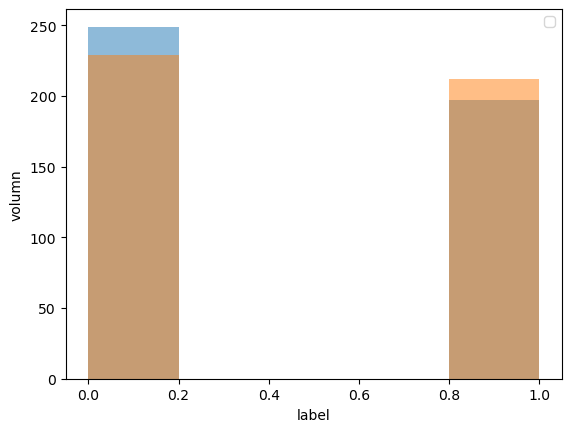

In [123]:
plt.hist(n_A1, alpha=0.5, bins=5)
plt.hist(n_A2, alpha=0.5, bins=5)
plt.legend(loc='upper right')
plt.xlabel('label')
plt.ylabel('volumn')
plt.show()


In [124]:
import scipy.stats as stats

# Perform independent t-test to compare the means of two groups
t_stat, p_value = stats.ttest_ind(n_A1, n_A2)

# Print test results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if there is a significant difference
alpha = 0.05
if p_value > alpha:
    print("No significant difference, A/A test passed.")
else:
    print("Significant difference found, A/A test failed. Check experiment setup.")


T-statistic: -1.1653
P-value: 0.2442
No significant difference, A/A test passed.


In [127]:
# Final AB test
t_stat, p_value = stats.ttest_ind(control_data['label'], treatment_data['label'])

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("stragety 2 has a significant increase; A/B test passed.")
else:
    print("stragety 2 does not have a significant increase; A/B test failed.")


T-statistic: -1.8723
P-value: 0.0614
Group B does not have a significant increase; A/B test failed.


In [129]:
t_stat, p_value = stats.ttest_ind(control_data['label'], treatment2_data['label'])

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("stragety 3  has a significant increase; A/B test passed.")
else:
    print("stragety 3  does not have a significant increase; A/B test failed.")

T-statistic: -1.5454
P-value: 0.1225
stragety 3  does not have a significant increase; A/B test failed.
